In [1]:
# created by zayaan. going to test using a basic neural network for the stuff
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
#we want to create a neural network, so we need to import the keras library
from keras.models import Sequential
import tensorflow as tf
from sklearn.ensemble import IsolationForest

In [21]:
csv_file = "500k.csv" 
df = pd.read_csv(csv_file, sep=",")
# individual photometry filters
u = df['u']
g = df['g']
r = df['r']
i = df['i']
z = df['z']

# color indices
u_g = u - g
g_r = g - r
r_i = r - i
i_z = i - z

# u_g = u_g[:-19500]
# g_r = g_r[:-19500]
# r_i = r_i[:-19500]
# i_z = i_z[:-19500]

# Effective temperature of star
temperature = df['Teff']

metallicity = df['FeH']

color_filters_df = pd.DataFrame()
color_filters_df['u_g'] = u_g
color_filters_df['g_r'] = g_r
color_filters_df['r_i'] = r_i
color_filters_df['i_z'] = i_z

# Effective temperature of star
color_filters_df['temperature'] = df['Teff']
color_filters_df['metallicity'] = df['FeH']
print(df.shape)

(500000, 7)


In [115]:
#iterate thru temperature,
#if its 4353, print out the corresponding color filters
# for i in range(len(temperature)):
#     if color_filters_df.iloc[i]['u_g'] > 10:
#         #print temperature
#         print("Temp: ", color_filters_df.iloc[i][''])
#         print("u_g: ", color_filters_df.iloc[i]['u_g'])


In [99]:
# # remove outliers by removing all data points that are outside 25th percentile - 75th percentile range
# dropped_rows = set()

# # TEMPERATURE OUTLIERS    
# Q1_temp = color_filters_df['temperature'].quantile(0.25)
# Q3_temp = color_filters_df['temperature'].quantile(0.75)
# IQR = Q3_temp - Q1_temp
# lower = Q1_temp - 1.5*IQR
# upper = Q3_temp + 1.5*IQR

# upper_array = np.where(color_filters_df['temperature']>=upper)[0]
# lower_array = np.where(color_filters_df['temperature']<=lower)[0]

# for element in upper_array:
#     dropped_rows.add(element)
# for element in lower_array:
#     dropped_rows.add(element)

# # U_G OUTLIERS
# Q1_temp = color_filters_df['u_g'].quantile(0.25)
# Q3_temp = color_filters_df['u_g'].quantile(0.75)
# IQR = Q3_temp - Q1_temp
# lower = Q1_temp - 1.5*IQR
# upper = Q3_temp + 1.5*IQR

# upper_array = np.where(color_filters_df['u_g']>=upper)[0]
# lower_array = np.where(color_filters_df['u_g']<=lower)[0]

# for element in upper_array:
#     dropped_rows.add(element)
# for element in lower_array:
#     dropped_rows.add(element)
    
# # G_R OUTLIERS
# Q1_temp = color_filters_df['g_r'].quantile(0.25)
# Q3_temp = color_filters_df['g_r'].quantile(0.75)
# IQR = Q3_temp - Q1_temp
# lower = Q1_temp - 1.5*IQR
# upper = Q3_temp + 1.5*IQR

# upper_array = np.where(color_filters_df['g_r']>=upper)[0]
# lower_array = np.where(color_filters_df['g_r']<=lower)[0]

# for element in upper_array:
#     dropped_rows.add(element)
# for element in lower_array:
#     dropped_rows.add(element)
    
# # R_I OUTLIERS
# Q1_temp = color_filters_df['r_i'].quantile(0.25)
# Q3_temp = color_filters_df['r_i'].quantile(0.75)
# IQR = Q3_temp - Q1_temp
# lower = Q1_temp - 1.5*IQR
# upper = Q3_temp + 1.5*IQR

# upper_array = np.where(color_filters_df['r_i']>=upper)[0]
# lower_array = np.where(color_filters_df['r_i']<=lower)[0]

# for element in upper_array:
#     dropped_rows.add(element)
# for element in lower_array:
#     dropped_rows.add(element) 

# # I_Z OUTLIERS
# Q1_temp = color_filters_df['i_z'].quantile(0.25)
# Q3_temp = color_filters_df['i_z'].quantile(0.75)
# IQR = Q3_temp - Q1_temp
# lower = Q1_temp - 1.5*IQR
# upper = Q3_temp + 1.5*IQR

# upper_array = np.where(color_filters_df['i_z']>=upper)[0]
# lower_array = np.where(color_filters_df['i_z']<=lower)[0]

# for element in upper_array:
#     dropped_rows.add(element)
# for element in lower_array:
#     dropped_rows.add(element) 

# color_filters_df.drop(dropped_rows, inplace=True)
# print(color_filters_df.sort_values(by=['temperature'], ascending=False))

            u_g      g_r      r_i      i_z  temperature  metallicity
274199  0.74974  0.27792  0.11534  0.01098         8388         0.78
266948  1.26185  0.18076 -0.00239 -0.08943         8388         0.78
13473   1.29980  0.11159 -0.10133 -0.11050         8388         0.78
265899  1.18326  0.07160 -0.09517 -0.08719         8388         0.78
13789   1.29981  0.14667 -0.02716 -0.05719         8388         0.78
...         ...      ...      ...      ...          ...          ...
310647  0.65794  0.29682  0.13021  0.03009         3690         0.05
25071   1.84317  1.69793  0.69444  0.43985         3690         0.05
272035  1.23492  0.60226  0.50272  0.36063         3690         0.05
194409  2.03738  1.21585  0.70653 -0.08243         3690         0.05
13339   1.51349  0.53067  0.16795 -0.22044         3690         0.05

[381336 rows x 6 columns]


In [22]:
# Model Training for Isolation Trees 
isoforest = IsolationForest(n_estimators=150, max_samples='auto',contamination=float(0.1), max_features=1.0)
isoforest.fit(color_filters_df[["temperature"]])

IsolationForest(contamination=0.1, n_estimators=150)

In [23]:
# Prediction
color_filters_df['anomalies_scores'] = isoforest.decision_function(color_filters_df[["temperature"]])
color_filters_df['anomaly'] = isoforest.predict(color_filters_df[["temperature"]])
color_filters_df = color_filters_df[color_filters_df['anomaly'] == 1]

#now do it u_g, g_r, r_i, i_z, metallicity
#isoforest = IsolationForest(n_estimators=150, max_samples='auto',contamination=float(0.1), max_features=1.0)
isoforest.fit(color_filters_df[["u_g"]])
# Prediction
color_filters_df['anomalies_scores'] = isoforest.decision_function(color_filters_df[["u_g"]])
color_filters_df['anomaly'] = isoforest.predict(color_filters_df[["u_g"]])
color_filters_df = color_filters_df[color_filters_df['anomaly'] == 1]
# #now do for rest of inputs
# # isoforest = IsolationForest(n_estimators=150, max_samples='auto',contamination=float(0.1), max_features=1.0)
# isoforest.fit(color_filters_df[["g_r"]])
# # Prediction
# color_filters_df['anomalies_scores'] = isoforest.decision_function(color_filters_df[["g_r"]])

# color_filters_df['anomaly'] = isoforest.predict(color_filters_df[["g_r"]])
# color_filters_df = color_filters_df[color_filters_df['anomaly'] == 1]
# #now do for rest of inputs
# # isoforest = IsolationForest(n_estimators=150, max_samples='auto',contamination=float(0.1), max_features=1.0)
# isoforest.fit(color_filters_df[["r_i"]])
# # Prediction
# color_filters_df['anomalies_scores'] = isoforest.decision_function(color_filters_df[["r_i"]])
# color_filters_df['anomaly'] = isoforest.predict(color_filters_df[["r_i"]])
# color_filters_df = color_filters_df[color_filters_df['anomaly'] == 1]
# #now do for rest of inputs
# # isoforest = IsolationForest(n_estimators=150, max_samples='auto',contamination=float(0.1), max_features=1.0)
# isoforest.fit(color_filters_df[["i_z"]])
# # Prediction
# color_filters_df['anomalies_scores'] = isoforest.decision_function(color_filters_df[["i_z"]])
# color_filters_df['anomaly'] = isoforest.predict(color_filters_df[["i_z"]])
# color_filters_df = color_filters_df[color_filters_df['anomaly'] == 1]
# #now do for rest of inputs
# # isoforest = IsolationForest(n_estimators=150, max_samples='auto',contamination=float(0.1), max_features=1.0)
# isoforest.fit(color_filters_df[["metallicity"]])
# # Prediction
# color_filters_df['anomalies_scores'] = isoforest.decision_function(color_filters_df[["metallicity"]])
# color_filters_df['anomaly'] = isoforest.predict(color_filters_df[["metallicity"]])
# color_filters_df = color_filters_df[color_filters_df['anomaly'] == 1]



#now do it 

# color_filters_df.head(100)
# list(color_filters_df['anomaly']).count(-1)
# print(color_filters_df.shape)
# color_filters_df = color_filters_df[color_filters_df['anomaly'] == 1]
# print(color_filters_df.shape)

In [24]:
print(color_filters_df.shape)

(407157, 8)


In [25]:
#the input of the model is the color indices, and the output is the temperature.
#lets perform this with a neural network
#we need to split the data into training and testing data
#we will use 80% of the data for training and 20% for testing
#we will also shuffle the data to avoid any bias

X = color_filters_df[['u_g', 'g_r', 'r_i', 'i_z', 'metallicity']].values
# X = color_filters_df[['g_r', 'r_i']].values
y = color_filters_df['temperature'].values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)


In [28]:
#plot the each X vs y
# plt.figure(figsize=(15, 5))
# plt.subplot(1, 4, 1)
# plt.scatter(X_train[:, 0], y_train, s=1, label='train')
# plt.scatter(X_test[:, 0], y_test, s=1, label='test')
# plt.xlabel('u_g')
# plt.ylabel('temperature')
# plt.legend()
print(y.shape)

(407157,)


In [29]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(5,)), #change input shape based on how many u using
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)  #1 neuron output
])

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

In [30]:
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

Epoch 1/20
8144/8144 [==============================] - 22s 2ms/step - loss: 38151100.0000 - mae: 441.0109 - val_loss: 179681408.0000 - val_mae: 306.1219
Epoch 2/20
8144/8144 [==============================] - 23s 3ms/step - loss: 7223507.5000 - mae: 260.2153 - val_loss: 208308176.0000 - val_mae: 295.6637
Epoch 3/20
8144/8144 [==============================] - 21s 3ms/step - loss: 1208815.8750 - mae: 253.8669 - val_loss: 200602512.0000 - val_mae: 303.4589
Epoch 4/20
8144/8144 [==============================] - 21s 3ms/step - loss: 364965.7188 - mae: 249.7836 - val_loss: 207067184.0000 - val_mae: 290.5034
Epoch 5/20
8144/8144 [==============================] - 21s 3ms/step - loss: 382731.2188 - mae: 248.9618 - val_loss: 218957584.0000 - val_mae: 300.5639
Epoch 6/20
8144/8144 [==============================] - 20s 2ms/step - loss: 387796.2500 - mae: 244.9609 - val_loss: 198810512.0000 - val_mae: 485.0753
Epoch 7/20
8144/8144 [==============================] - 20s 2ms/step - loss: 412766.

In [31]:
#print accuracy of model
print(model.evaluate(X_test, y_test))

2545/2545 [==============================] - 4s 2ms/step - loss: 115955.3594 - mae: 211.1428
[115955.359375, 211.142822265625]


In [32]:
predictions = model.predict(X_test)

#assign max to a really low number
max = -10000000
#assign min to a really high number
min = 10000000

avg = 0

for i in range(len(X_test)):
    # print("Input:", X_test[i])
    #if actual output is greater than 250000, then pritn it
    if y_test[i] == 4353 and predictions[i][0] > 250000:
        print("Input:", X_train[i])
        print("Expected Output:", y_test[i])
        print("Actual Output:", predictions[i][0])  # predictions[i] is a 2D array, so we access the value with [0]
        print()
    #update max and min accordingly, based on difference in expected and actual output
    if abs(y_test[i] - predictions[i][0]) > max:
        max = abs(y_test[i] - predictions[i][0])
    if abs(y_test[i] - predictions[i][0]) < min:
        min = abs(y_test[i] - predictions[i][0])
    avg += abs(y_test[i] - predictions[i][0])
avg = avg / len(X_test)
# print(min, max, avg)

2545/2545 [==============================] - 4s 2ms/step


In [33]:
r2 = r2_score(y_test, predictions)
print("R2 Score:", r2)

R2 Score: 0.8634902246498746


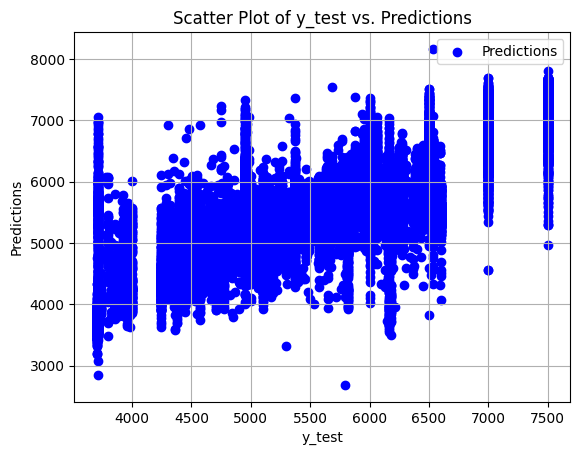

In [34]:
plt.scatter(y_test, predictions, c='b', marker='o', label='Predictions')

# Add labels and a 1:1 line for reference
plt.xlabel('y_test')
plt.ylabel('Predictions')
plt.plot(color='red', linestyle='--', label='1:1 Line')

# Add a legend
plt.legend()

# Show the plot
plt.title("Scatter Plot of y_test vs. Predictions")
plt.grid(True)
plt.show()